# John Wang (are2ag@virginia.edu) DS 5001 Spring 2023

Note: Raw Data files and Tables were too large to be uploaded onto Github, so the data are stored here: https://virginia.app.box.com/folder/202097523074?s=76ov0z3zvbbt1s1fnf5arq2pozi4pf75

# Introduction

In recent years, education has become a particularly contentious topic in politics, especially in the state of Virginia. The major point of contention has been the handling of COVID-19. School districts were faced with tough decisions, ranging from keeping schools entirely virtual to reopening schools and completely foregoing masking. While the handling of the COVID-19 pandemic has been one area of contention, another set of escalating concerns have been "Identity Politics”— Critical Race Theory (CRT) and LGBTQ+ issues. In particular, there is concern among some parents that schools are teaching students that "whites are racist and blacks are victim" or that schools are allowing "pedophilia homosexual leanings and pornography books" in libraries (Campbell County School Board Meeting, 2021). The governor candidate at the time, Glenn Youngkin, actively made those contentious topics a focal point in his campaign during the lead-up to the 2021 Governor Election in Virginia (Rankin and Barakat, 2022).

This exploratory text analytics project attempts to unpack the perspectives of community members on these 'divisive' education topics in the school board meetings leading up to Governor Youngkin's election. Transcriptions of the public comment section of school board meetings were used to form the corpus, allowing us to ask the following research questions (RQ):

RQ 1) What are the topics covered and prioritized in school board meetings? Are certain topics across documents and words closely associated to each other?

RQ 2) What is the overall sentiment for each school district, and is that correlated with particular topics?

RQ 3) How similar were school board meetings across and within districts? Are these school board meetings still similar after adjusting for latent semantic structure? How might lexical differences explain why school board meetings are similar or different? 

The first research question enables us to understand whether COVID-19 and "Identity Politics" are even covered within school board meetings and whether community members even care about them. In addition, unpacking whether these topic are closely related helps identify the interconnected perspectives of community members. The second research question begins to clarify whether school district's board meetings were positive or negative and makes associations between the topics covered in those district's meetings and how community members felt about the topics. The third research question provides us with the insights of how these school districts may be similar or different from each other and between meetings. In total, these research questions examines whether 'divisive' education topics are discussed, associated with each other, positively or negatively discussed, and connect them to particular groups of school districts.

# Source Data

A team of undergraduate research assistants systematically collected videos of the public comments section of the two school board meetings leading up to the November governor election (11/2/21) for each school district in Virginia. The videos were transcribed using otter.ai to transform the data into text. When video data were unavailable, transcripts of school board meetings along with the public comment summaries in meeting minutes were used. 114 out of the 132 school districts had at least one usable artifact—87 had video(s), 2 had transcripts, and 25 had public comment summaries. Further information on the collection of source data can be found in VA_School_Board_Meeting_Data_Summary. In total, there are 193 artifacts within the Corpus with an average length of approximately 3,058 words. The data can be found in [RAW DATA](https://virginia.box.com/s/hmges9ns3vmnitp98w0rzyqp1namhaos).

The files have been formatted to have a consistent structure: YYYY_MM_DD_Transcript_SCHOOL_DISTRICT in a .txt file format. All files (transcripts and public comment summaries) were adjusted to match the format of otter.ai. Each file within our dataset has a specific format of "Unknown Speaker" followed by a time stamp (e.g., 0:33). The transcription of the unknown speaker's statement follows in the subsequent line.

# Data Model

Describe the analytical tables you generated in the process of tokenization, annotation, and analysis of your corpus. You provide a list of tables with field names and their definition, along with URLs to each associated CSV file.

The core tables of Corpus, Library, and Vocab were created under the first [notebook](https://github.com/jwang2461/Wang_John_DS5001_Final/blob/c4c3cf27093049eb8fbac276e7528109449c0b4c/2_TEXT_ANALYTICS_CODE/1_DATA_IMPORT_CORE_TABLE_CREATION.ipynb). First, I set up an Ordered Hierarchy of Content Objects (OHCO) with 'district_id', 'date_order', 'speaker_num', 'sentence_num', and 'token_num': this encompasses the basic structure of the data. After iterating through the different folders and pulling out the transcripts, I created the [Library](https://virginia.box.com/s/g5q3e27re071wcu3ug0lxow6g3mhxtt3) to include 'district_id' and 'date_order' (allowing for the ability to merge with other tables), the source file path, the date of the transcript, the district's name, and the transcript title. Next, I created the [Corpus](https://virginia.box.com/s/3wgtd148a22vqadcw3x5zm3avo1frg49) by importing the lines of each transcript, clipping unnecessary otter.ai lines, and chunking text by speakers. I then applied NTLK to partition the speaker's lines into sentences and subsequently applied NTLK to tokenize the sentences. The Corpus incorporates the previously described OHCO. The Corpus then identified the term string and the parts of speech with each token. Finally, the [Vocab](https://virginia.box.com/s/sxj4ixeqdbl40drmxq358jxlp8o6vp4n) table was created from the Corpus by summing up the counts of each term, conducting basic probabilities for entropy calculations, identifying the maximum part of speech and stop words. In addition, under the [Analysis notebook](https://github.com/jwang2461/Wang_John_DS5001_Final/blob/c4c3cf27093049eb8fbac276e7528109449c0b4c/2_TEXT_ANALYTICS_CODE/2_ANALYSIS.ipynb), a few additional columns were added to the Library and Vocab tables that can be found in the "Submission" versions. The ["Submission" Library](https://virginia.box.com/s/pegbs39z23o9vx6gl0gpzsm6i42g23z4) table also includes a label of the district name and date_order, the dendrogram cluster that the transcript belonged to as well as the pca cluster that the transcript belonged to. The ["Submission" Vocab](https://virginia.box.com/s/me9248rkaqyyfb56c46dko3xzd604jz9) table also includes TF-IDF as well as DF-IDF.

# Exploration

To address the first research question, "What are the topics covered and prioritized in school board meetings? Are certain topics across documents and words closely associated to each other?", I create Figures 1-6. Figures 1-5 focus on Topic Modeling, while Figure 6 focuses on Word Embeddings. To explore the topics covered and prioritized in school board meetings, I restricted the Corpus's document string to nouns before applying the CountVectorizer to further limit the Corpus to 4000 maximum features while removing English stop words to create the vector space in the table [TRANSCRIPTS_DOCS_DISTRICT_DATE](https://virginia.box.com/s/t4kw5ygeq4t8y9nihyu9hel6qbtvoagi). I then apply Latent Dirichlet Allocation with 10 topics, 50 iterations, learning offsets of 50, and a random state of 0 to generate both the [THETA](https://virginia.box.com/s/qb883w238z3374x9s3y21p68l3n6gf8v) and [PHI](https://virginia.box.com/s/kw0ceg4i98ktg1jsxrwb797884x53t5b) tables (Note: I create a [PHI](https://virginia.box.com/s/zg984lww8hdp92bj2sum5d9atyfu9a2n) table that is mergeable to the Vocab table as well). To generate Figure 1, I simply took the document weight sum and plotted the topics in ascending order, allowing me to understand both the topics covered and prioritized in school board meetings. However, since it is very possible for these topics to be closely associated, I generate Figures 2-5 to capture both the document's and the topic's similarity and contiguity to unpack those associations. Figures 2 and 4 leverage Hierarchical Agglomerative Clustering using cosine similarity and ward linkage methods to respectively group the documents and topic words into similar topics. Figures 3 and 5 estimates the kendall rank correlation between topics for each Theta and Phi before plotting them into a heatmap. Finally for Figure 6, I create a [Word Embedding table](https://virginia.box.com/s/pb6o5bjxz7xzhly3l0vgfo99dijrn169) by converting the Corpus into a format usable for Gensim Corpus and applying word2vec. The word2vec parameters leveraeg a window of 3, vector size of 256, minimum count of 50, and 4 workers. I then generate a set of coordinates from the word embeddings and apply t-distributed Stochastic Neighboring Embedding with a learning rate of 200, perplexity of 20, two components, one thousand random iterations, and a random state of 1337. I further restrict the plot to better align with the topic modeling done.

To address the second research question of "What is the overall sentiment for each school district, and is that correlated with particular topics?" I prioritize a rules-based approach over a lexicon-based approach for measuring sentiment (but create the lexicon-based sentiment anyway in [TRANSCRIPT_DICTIONARY_LEXICONS](https://virginia.box.com/s/2vecybbb51yj690kedfpbrzxe0bemghr). In particular, a lexicon-based approach features a limited vocabulary, assumes monosemy, and cannot detect context; these problems may mis-measure the actual sentiment happening in individual's speeches at school board meetings, so I apply a VADER sentiment approach. I do so by setting up the Corpus into sentence strings before using VADER's sentiment intensity analyzer; the compound sentiments of each sentence are averaged at the district-level (instead of document) to create [TRANSCRIPT_DISTRICT_ID_SENTIMENT](https://virginia.box.com/s/almgbifdcgl57f4tsem18lbyyl6eayb1) table to help answer the research questions. To describe the overall sentiment for each school district, I simply plot a histogram with 20 bins and default settings to achieve a baseline understanding of compound sentiment for each school district (Figure 7). I then identify the top three topics for each school district by extracting out the topics with the largest alpha values from the previously conducted topic modeling before merging the compound sentiment. I then create a set of scatter plots (Figures 7-10) that correlates each school district's top 3 topics and the compound sentiment score.

To answer the final set of research questions of "How similar were school board meetings across and within districts? Are these school board meetings still similar after adjusting for latent semantic structure? How might lexical differences explain why school board meetings are similar or different?" I create Figures 10-21. To start, I create a bag of words at the transcript level ('district_id', 'date_order') and compute the TF-IDF using the max count and standard approach (log2(N/DF)) for that bag. To summarize the TF-IDF, I sum the values at the transcript level before identifying the max for each term. Afterwards, I create doc-pair tables (transcript pairs) and compute the cosine similarity between the transcript pairs. I then create Figure 11 by using Hierarchical Agglomerative Clustering (HAC) with the cosine similarity, a ward linkage method, and a color threshold of 1.5. To account for potential concerns of a simple HAC approach, I also adjust for the latent semantic structure by employing a Principal Component (PC) Analysis. The Principal Component Analysis tables were created by reducing the vocab table into the top 1000 significant nouns, verbs, and adjectives. I then normalize the document vector lengths as well as center the term vectors before computing the covariance matrix and decomposing the matrix. I compute the explained variance; although it appears that multiple principal components have explained variance greater than 1 (Appendix Figure 1), I solely prioritze the first three principal components due to the significant drop of variance explained after the third principal component and create [TRANSCRIPT_COMPS](https://virginia.box.com/s/py9jt3gglkrzt5taysr4l18c1wpx70mc). I then project the components onto both the vocabulary to create the [loadings table](https://virginia.box.com/s/f9b4or585nxwu1i5wr8s623gjq38xply) as well as project the documents onto the components to create a [document component matrix table](https://virginia.box.com/s/fqijyucgnhfogd3nabq3ofz385pxldj2). I generate Figure 12 by taking the projected documents onto the Principal Components and using HAC with the same cosine similarity distance measure, ward linkage method, and a color threshold of 1.5. Finally, to address the last portion of the research question of how lexical differences might explain the similarity acrosss and within school districts, I start by visualizing the loadings for each pair of principal components in Figures 13, 16, and 19. I then take the documents that are projected onto the components and merge them with their original dendrogram cluster as well as their principal component-based cluster to create Figures Figures 14, 17, and 20 as well as Figures 15, 18, and 21 respectively.

# Interpretation

### RQ 1 Findings: School board meetings prioritize not only general school topics but also COVID-19 and closely related Identity Politics topics. Similarities of key terms appear to support connections of those topics.

As seen in Figure 1, there are a variety of topics that have been covered in the public comment sections of school board meetings. A reasonable interpretation of those topics in their order of priority (doc_weight_sum) are as follows: Topic 00 consists of General School Topics; Topic 03 contains Mask Mandates/COVID-19; Topic 07 focuses on School Operations; Topic 01 includes School Staffing Problems; Topic 02 involves Community Member Rights; Topic 06 embodies "Critical Race Theory"; Topic 04 covers LGBTQ+ Issues; Topic 08 encompasses School Extracurriculars; Topic 09 entails Assessments and Performance; and Topic 05 highlights History and Invoking the Founding of the U.S. Although there initially appears to be a diversity in the topics covered, the topics appear to be a lot more similar across documents than the actual topic words employed.

In particular, Figures 2 and 3 both explicitly identify LGBTQ+ Issues (T04) and History/Invoking the Founding of the U.S. (T05) as tightly connected along with Assessments and Performance (T09) and School Operations (T07). Although the Topic Similarity approach in Figure 2 places both Community Member Rights (T02) and "Critical Race Theory" (T06) at opposite ends of the hierarhical agglomerative cluster tree, the Topic Contiguity correlations appears to draw a moderately positive correlation with Topics 2 and 4 to 9. One interpretation may be that community members (particularly parents) believe that they have the right to impose their views on a range of topics such as LGBTQ+ Issues, Critical Race Theory, School Operations, School Extracurriuculars, as well as Assessments and Performance. These community members may invoke the Founding Fathers to justify their rights to do so. This tight connection of documents that discuss these topics may be indicative of all of the points of contentions are actually intricately connected. The remaining topics across documents such as General School Topics, School Staffing Problems, and Mask Mandates may ultimately serve as distinctive issues of prioritization for various school board meetings.

Although Figures 4 and 5 suggest that there may be relatively little connection between terms of topics, with the exception of T4/T5, Figure 6's word similarity analyses support connections among previously described topics across documents. Figures 4 and 5 employ Topic Similarity and Topic Contiguity: most terms across topic words are weakly correlated except LGBTQ+ Issues and History / Invoking the Founding Fathers. However, by taking a word embeddings approach in Figure 6, there are clusters of topics around Identity Politics. From (15,-10) to (50,10), words like Race, Theory, Racist, Gender, Transgender, Discrimination, Equity, Bathroom, Color, Skin, Diversity, Risk, Athletes, Activities, Equality, Freedom, and Rights are all terms that are located relatively closely and hence have similar associations. These are similarly aligned with topics discussed in school board meetings.

### RQ 2 Findings: School districts overwhelmingly have positive sentiments. These positive sentiments tend to be around LGBTQ+ Issues, General School Topics, and School Operations. Negative sentiments in school districts emerge for school districts focused on School Staffing Problems and Extracurriculars. Positive sentiments for Community Member Rights, Mask Mandates, Critical Race Theory, as well as Assessments and Performance occur when prioritized as a primary topic but negative sentiments manifest when prioritized as a secondary topic.

Upfront, it's important to acknowledge that there is a clear statistical limitation with this approach; the ideal approach would identify the sentiment of each individual speaker and examine the extent to which that individual discusses a particular topic before drawing correlations with sentiment and topic. Unfortunately, my analyses are currently done at the district-level, so it would be out of the current scope of research questions. Even so, the primary topic of discussion may still serve as a valuable tool: at minimum, the topic_1 was discussed as part of >30% of the mixture of topics up to nearly 100% of the mixture of topics (Appendix Figure 2). The majority of the sentiment is likely attributable to that particular topic — of course, it is very possible for all the  sentiment to be tied to another topic beyond topic 1. Bringing in topic_2 helps alleviate some of those problems since it coverages another substantial mixture of topics (Appendix Figure 3). Topic_3 may add some but not too much additional value since it barely covers any mixture of topics (Appendix Figure 4), so I avoid interpretations of Figure 10.

First, Figure 7 shows the distribution of VADER compound sentiments across school districts. As can be very clearly shown, most sentiments are positive in the school district overall. It is difficult to causally attribute why all these districts are positive overall, but one hope is that the topics covered may be a useful explanation for why some school districts have positive sentiments. 

It appears that LGBTQ+ Issues (T04) are associated with positive sentiments across school districts that feature those topics as either the primary or secondary topic in Figures 8 and 9 respectively. This may be promising since LGBTQ+ groups have been under attack, so there may be some signal that people are willing to combat it and express positive sentiments toward LGBTQ+ groups. Other positive sentiments, ranging from weak to moderate, with the primary (Figure 8) and secondary (Figure 9) topics consist of General School Topics (T00) and School Operations (T07), which may be potentially attributable to positive thoughts about what's currently happening in schools.

The only strongly negative topic between the primary (Figure 8) and secondary (Figure 9) topic is School Staffing problems (T01), which makes sense given conversations around general shortages (teachers/substitutes/bus drivers). Other negative sentiments (ranging from weak to moderate) consist of School Extracurriculars (T08). Although it is unclear a priori why that may be true, it may be possible that Extracurricular activities were impacted due to COVID-19 and the broader situation around Identity Politics.

The remaining topics of Community Member Rights, Mask Mandates, Critical Race Theory, as well as Assessments and Performance as associated with positive sentiments when prioritized as the primary topic (Figure 8) but are associated with negative sentiments when prioritized as the secondary topic (Figure 9). It is perplexing why certain topics may be associated with positive sentiments when focused on as the primary topic but subsequently associated with negative sentiments when focused on as the secondary topic. One interpretation may be that school districts that have community members that self-select to overwhelmingly discuss these issues may have gratitude toward the school board on those topics. Community members that are "forced" to speak on issues that may not be the focal point of the school district may tend to bring negative sentiments toward those topics, motivating their need to speak out in the first place.

### RQ 3 Findings: School board meetings fell into three broad groups in the original Hierarchical Agglomerative Clustering, and after adjusting for latent semantic structure, fell into four groups that were still largely stable. The mixture of COVID-19, Identity Politics, and School Operations components characterize the differences in groups.

Many school board meetings were quite similar across school districts as well as within. The Hierarchical Agglomerative Clustering in Figure 11 shows that school board meetings were part of three broad groups, so these school district's board meetings are similar. 45 school board meetings were in the first group (Orange); 38 school board meetings were in the second group (Green); and 110 school board meetings were in the third group (Green). The majority (82/114) of school district's board meetings were contained in the same cluster, indicating that different school board meetings were relatively similar in content. Figure 12 conducts another Hierarchical Agglomerative Clustering using the projected documents onto the principal components to show that school board meetings continue to be relatively similar over four broad groups. The majority (73/114) of school district's board meetings still continue to be in the same cluster, reinforcing that the different school board meetings are similar in content within district. Although the groups become more nuanced when attempting to uncover the latent semantic structure, there is still some degree of evidence that certain school districts may be 'similar' in their content due to the stability of school district's board meetings in both analyses.

The mixture of COVID-19, Identity Politics, and School Operations appear to help explain why these school districts are similar or different. In particular, PC0 appears to focus on COVID-19, and PC1 appears to focus on Identity Politics in Figure 13; PC0 still appears to focus on COVID-19, and PC2 appears to focus on "School Operations / General Business" (i.e. teacher pay, staffing, transportation, etc.) in Figure 16; and finally, PC1 highlights Identity Politics while PC2 encompasses School Operations in Figure 19. When school district's board meetings are projected onto those components and visualized according to their original dendrogram cluster (Figures 14, 17, and 20) and pca cluster(Figures 15, 18, and 21), the mixture for each cluster becomes increasingly clear. For the dendrogram clusters (Figures 14, 17, and 20), the 1st cluster (Green) appears to have a focus on COVID-19 with some discussion around Identity Politics and School Operations; the 2nd cluster (Red) again discuss COVID-19 as well as School Operations but Identity Politics are less discussed; the 3rd cluster (Blue) shows board meetings that focus on School Operations and Identity Politics with some discussion around COVID-19. The pca clusters largely show something similar: the 1st cluster (Green) emphasizes COVID-19 with some conversations around School Operations but Identity Politics appear far less relevant; the 2nd cluster (Blue) discusses both COVID-19 and Identity Politics with far less emphasis on School Operations; the 3rd cluster (Purple) actually does not appear to be well represented by any of the three topics; and the 4th cluster (Red) focuses on Identity Politics and School Operations but less so on COVID-19. Overall, it appears that the three components of COVID-19, Identity Politics, and School Operations or the lack of it largely characterize the differences and similarities for these school board meetings.

# References

### Research Question 1

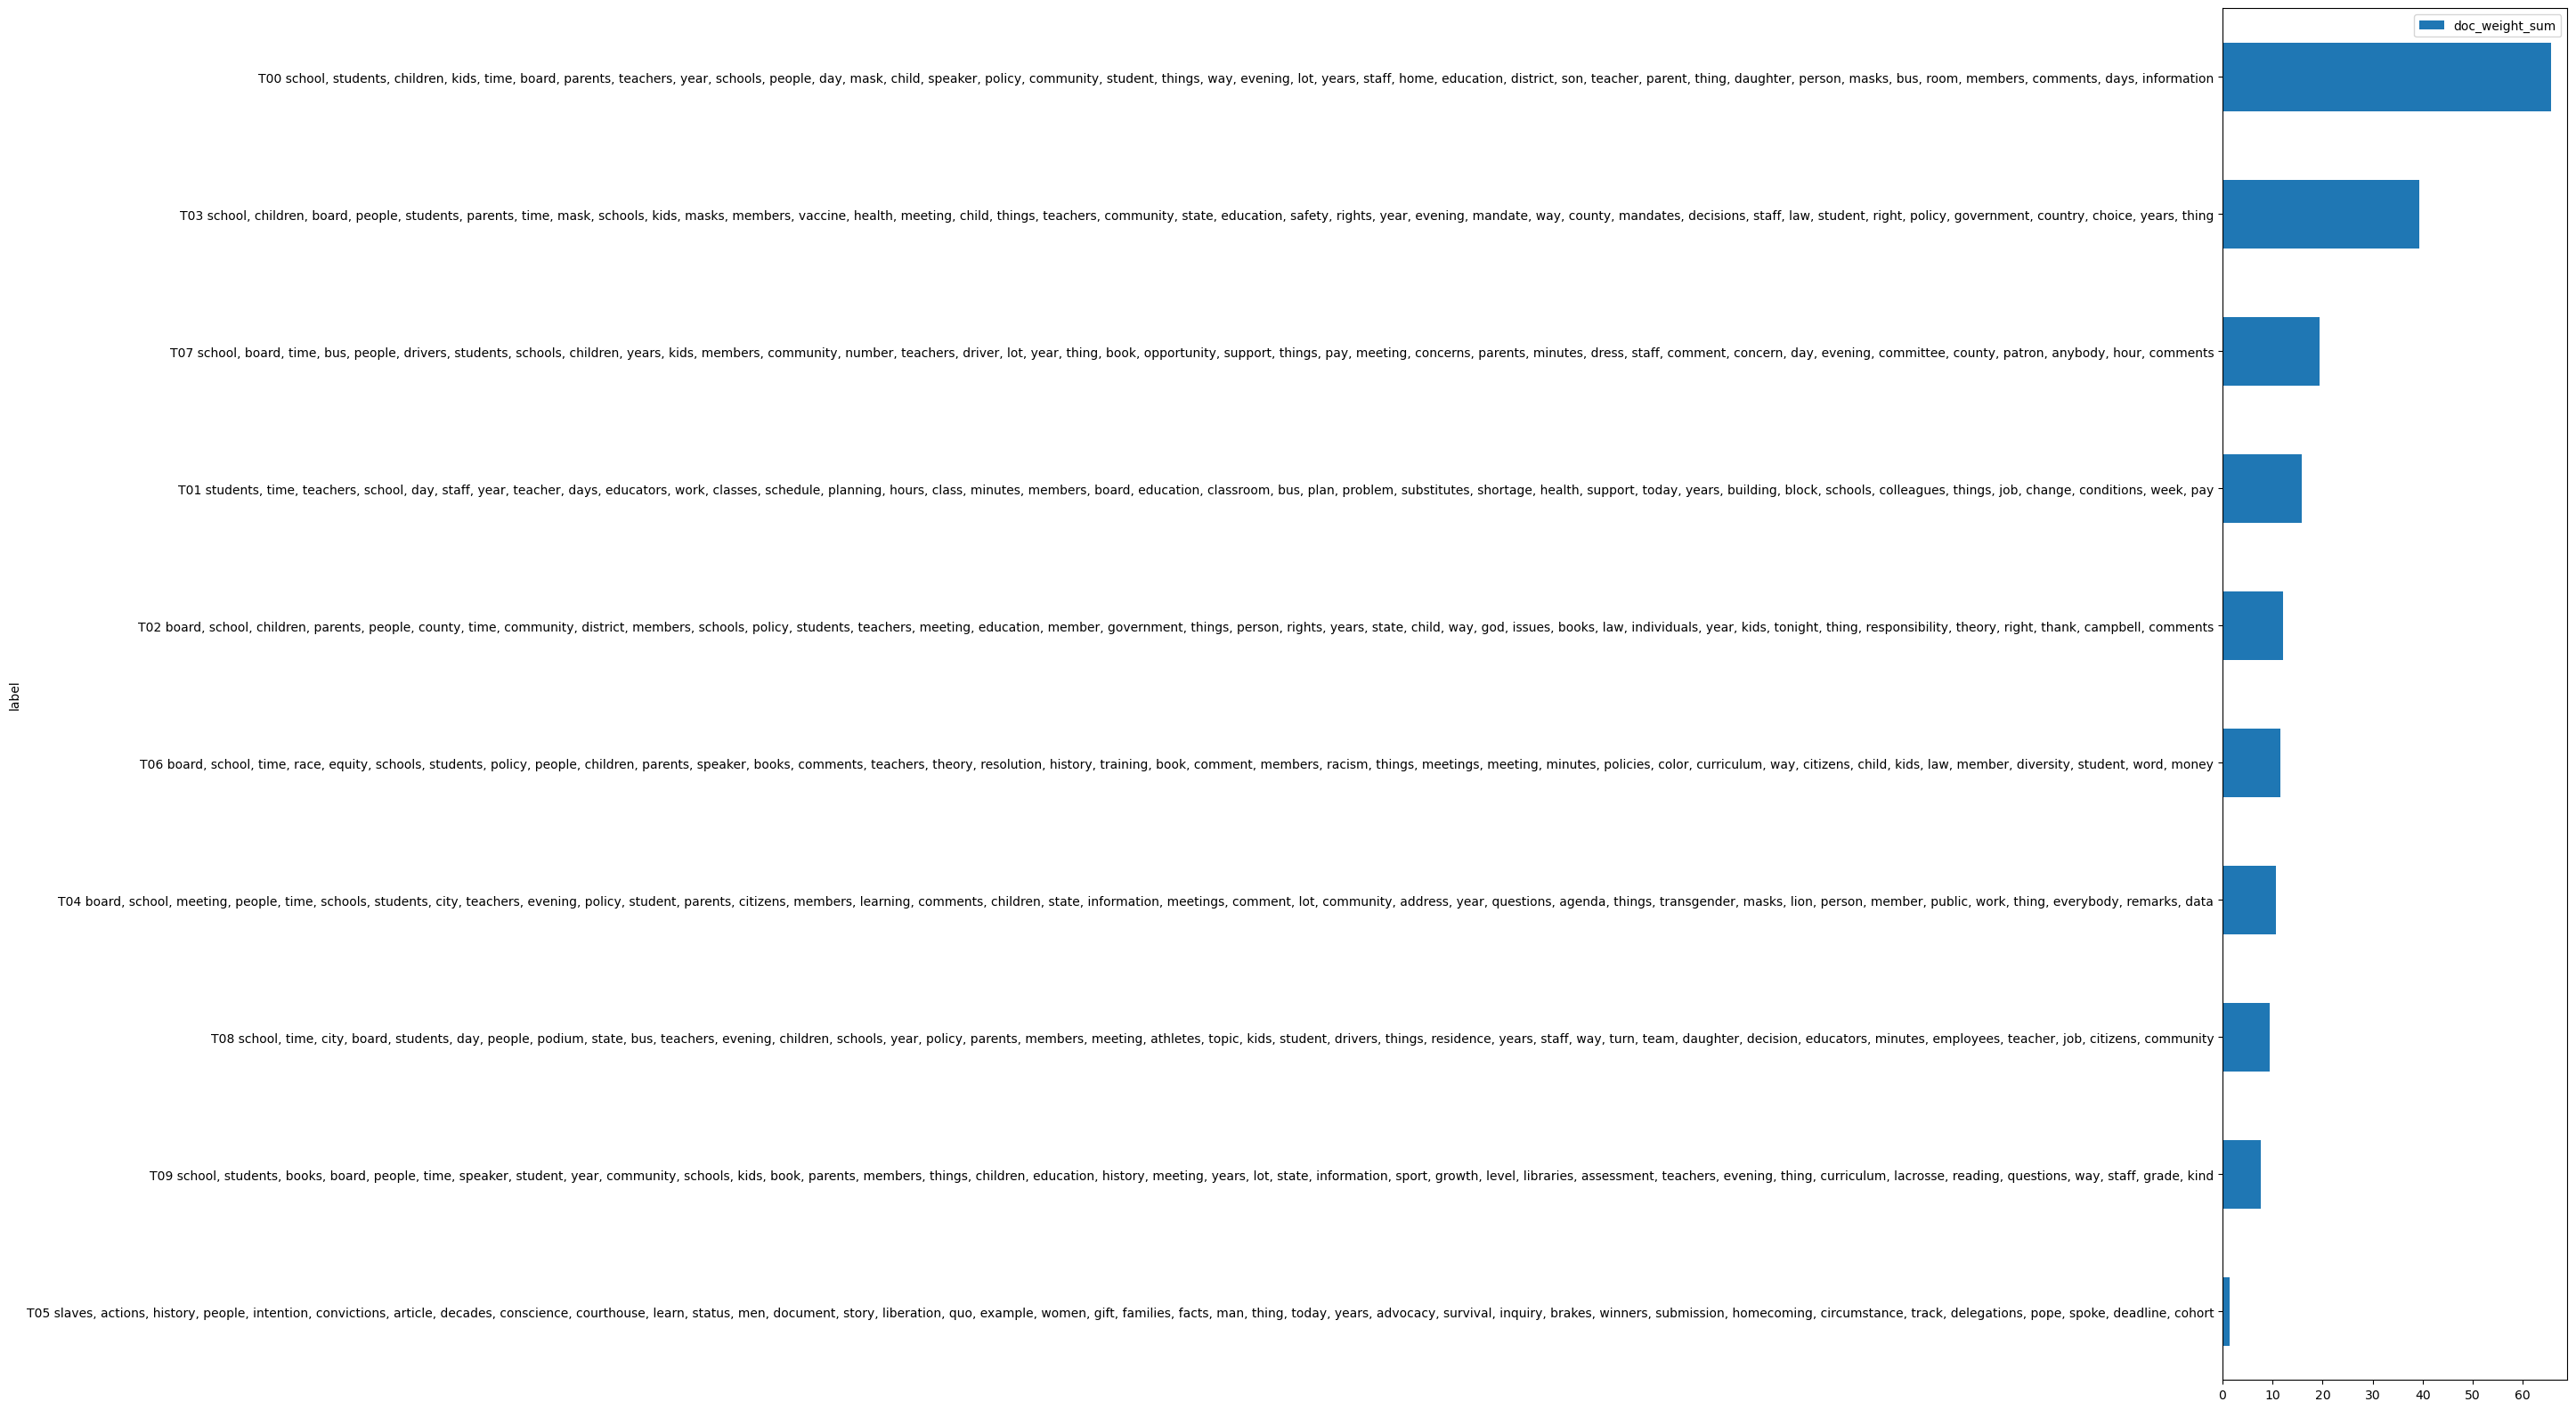 <h1><center>Figure 1: Topics</center></h1>

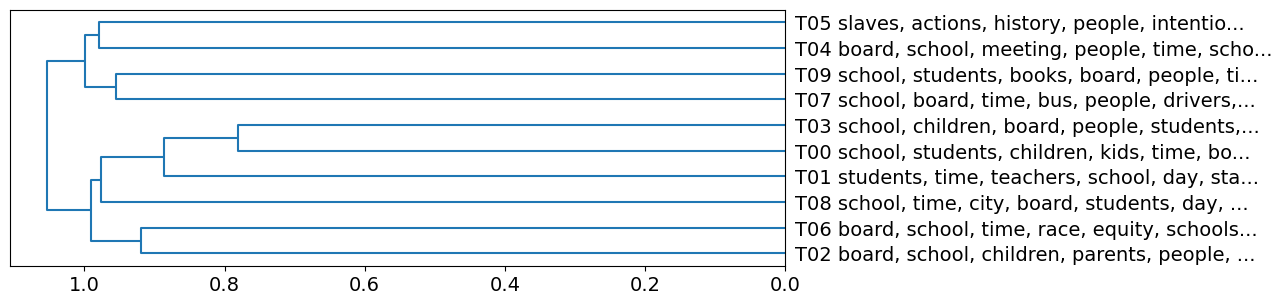<h1><center>Figure 2: Document Word Similarity</center></h1>

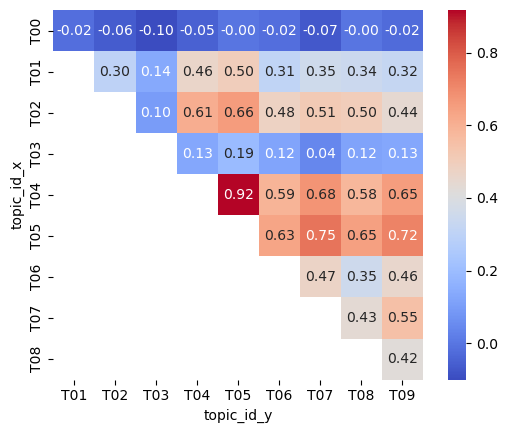<h1><center>Figure 3: Document Word Contiguity Heatmap</center></h1>

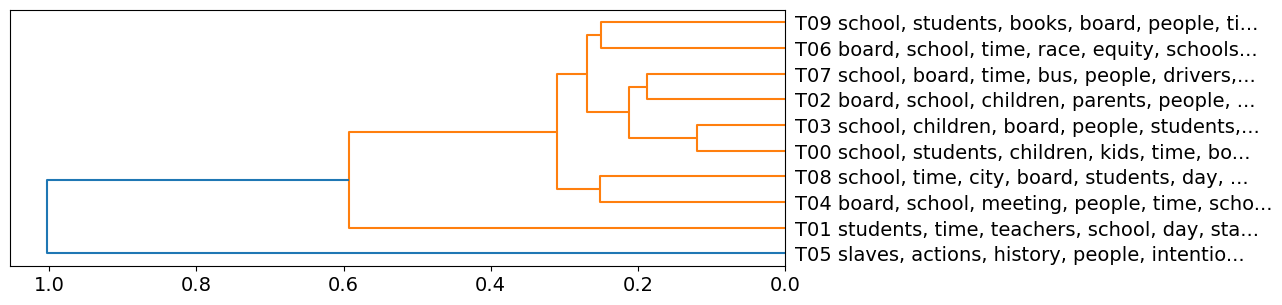<h1><center>Figure 4: Topic Word Similarity</center></h1>

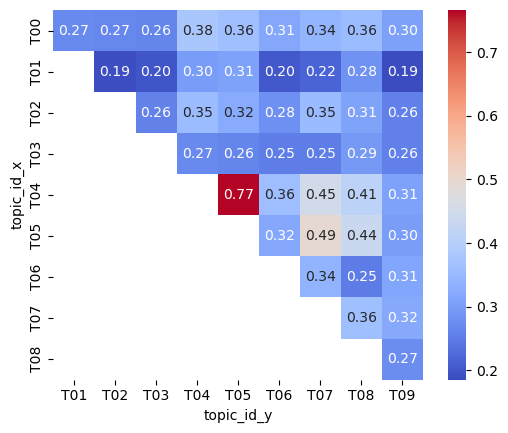<h1><center>Figure 5: Topic Word Contiguity Heatmap</center></h1>

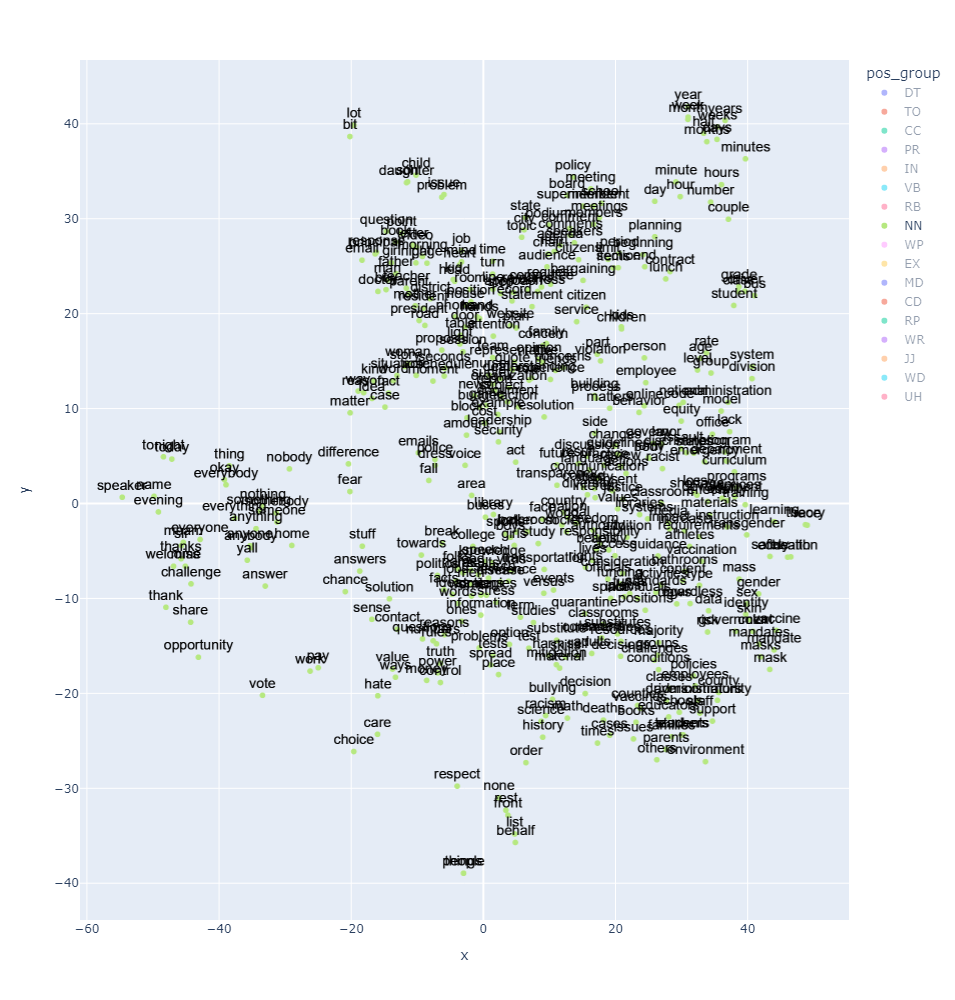<h1><center>Figure 6: T-SNE PLOT NOUNS</center></h1>

### Research Question 2

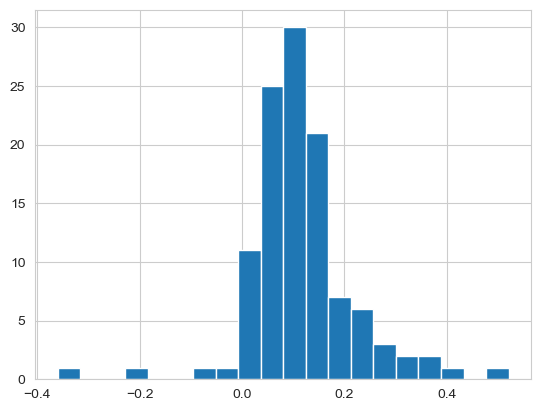<h1><center>Figure 7: School District's Sentiment Distribution</center></h1>

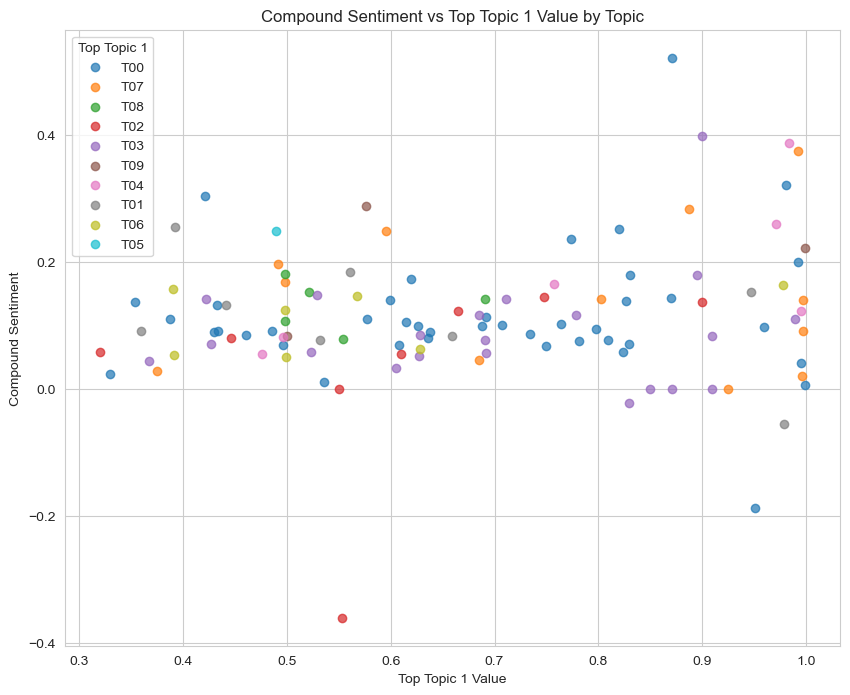<h1><center>Figure 8: 1st Top Topic Sentiment Correlations</center></h1>

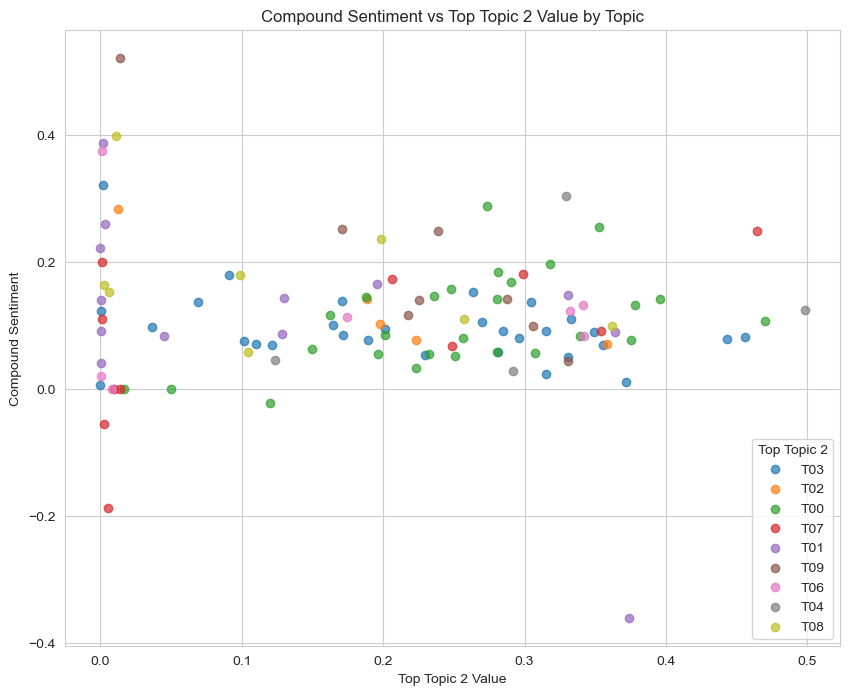<h1><center>Figure 9: 2nd Top Topic Sentiment Correlations</center></h1>

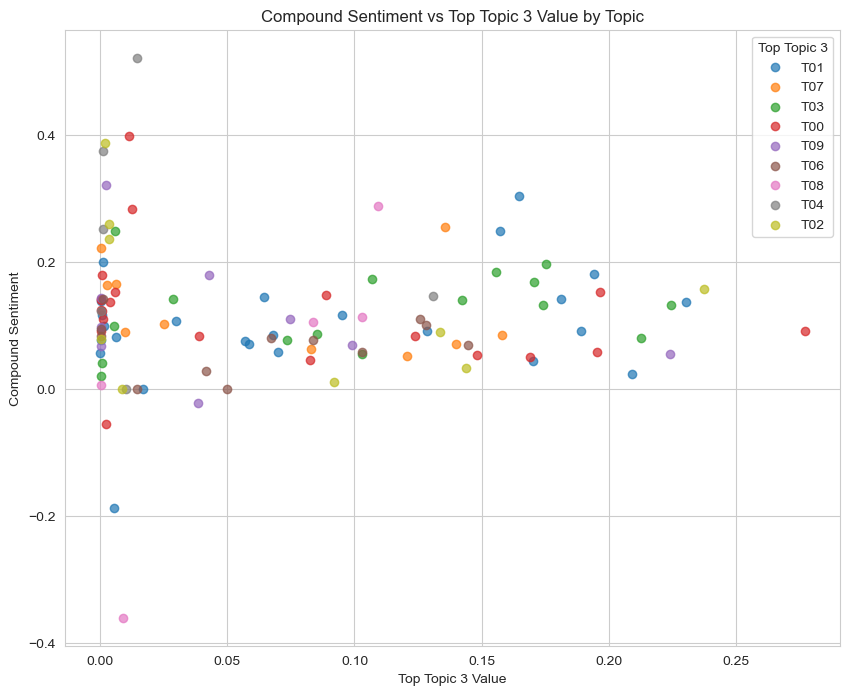<h1><center>Figure 10: 3rd Top Topic Sentiment Correlations</center></h1>

### Research Question 3

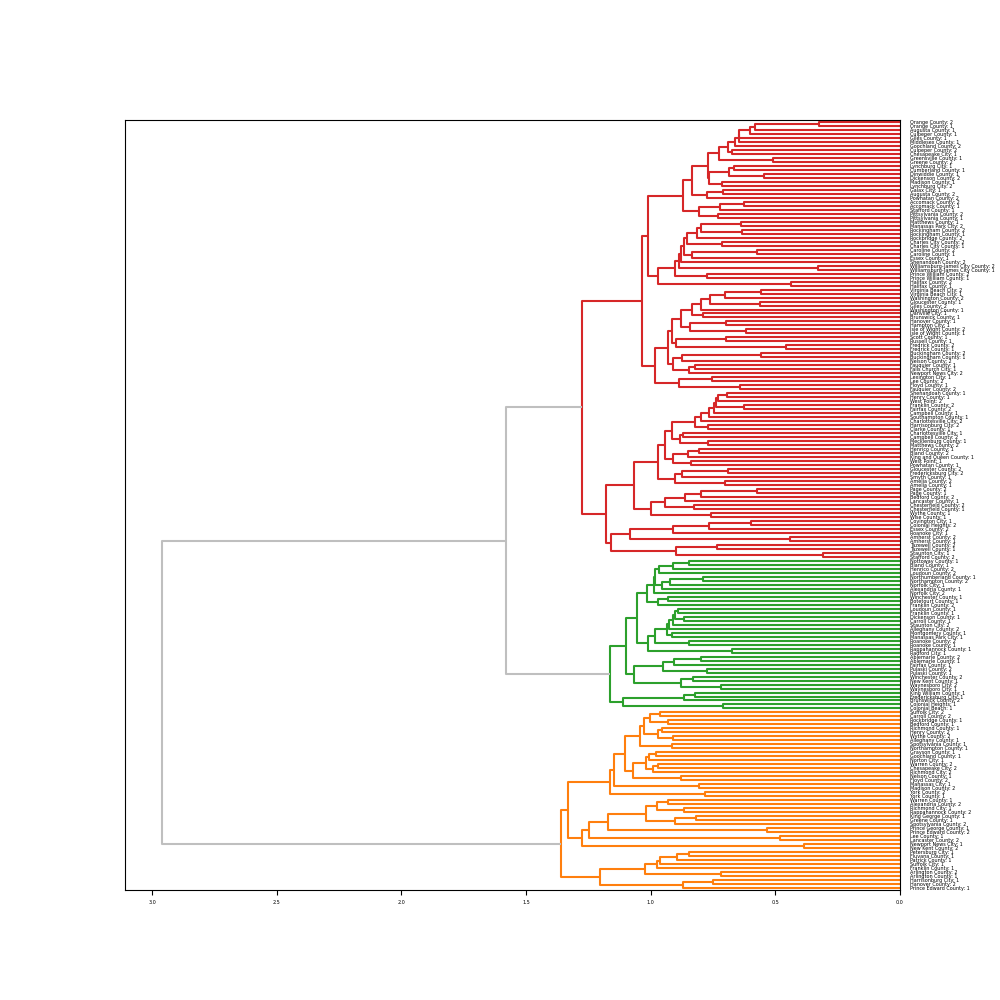<h1><center>Figure 11: Hierarchical Agglomerative Clustering of Transcripts</center></h1>

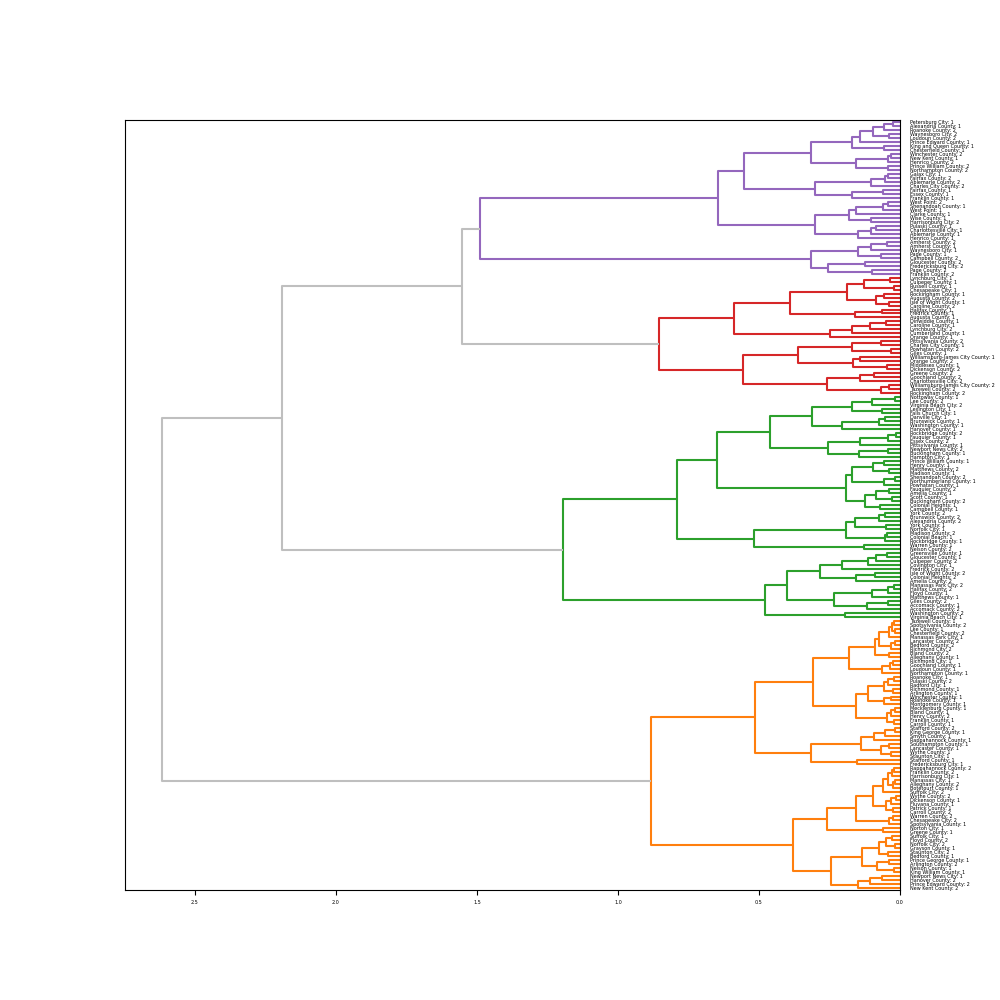<h1><center>Figure 12: Hierarchical Agglomerative Clustering of Transcripts after Principal Component Analysis</center></h1>

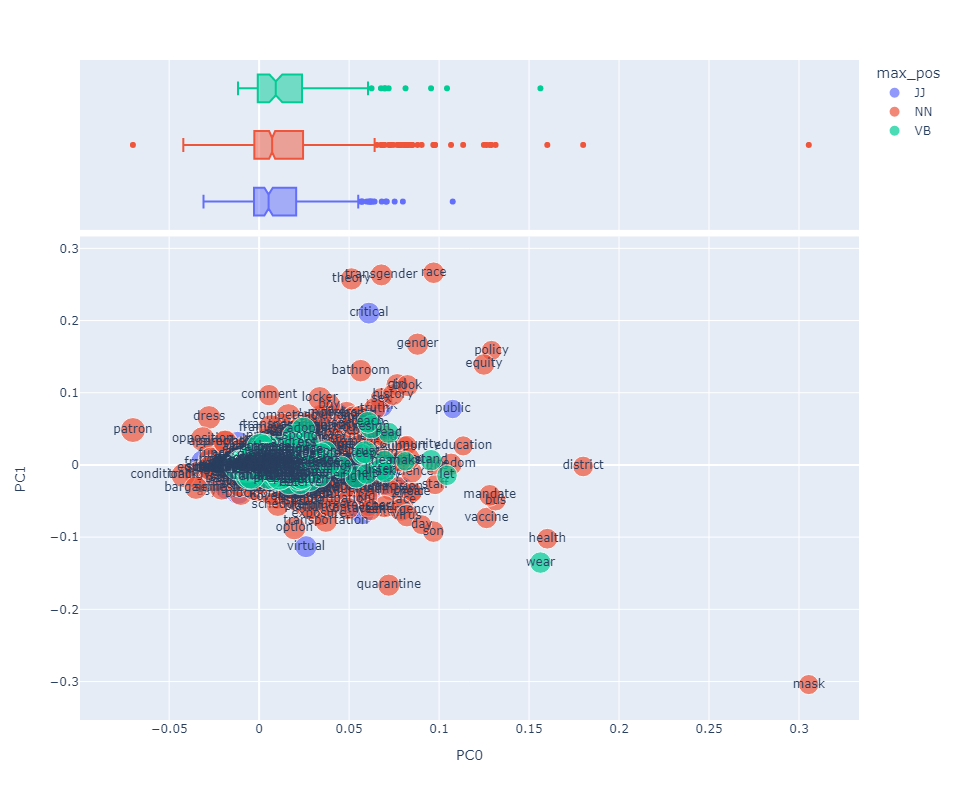<h1><center>Figure 13: Loadings of PC0 and PC1</center></h1>

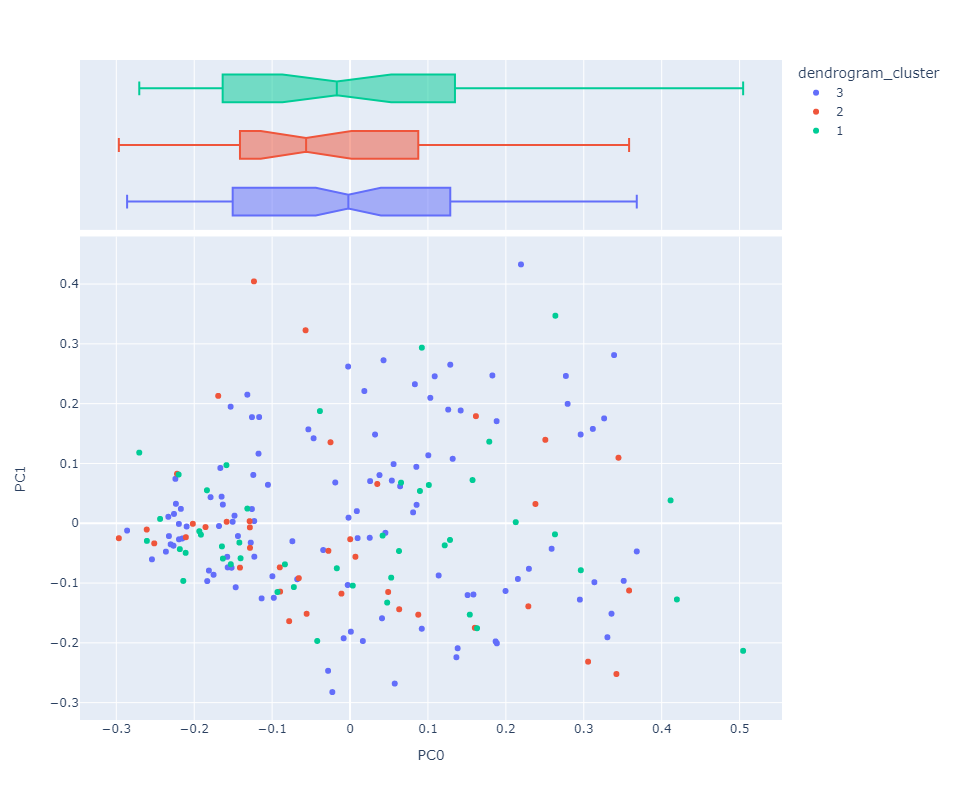<h1><center>Figure 14: Projected Documents on PC0 and PC1 by Dendrogram Cluster</center></h1>

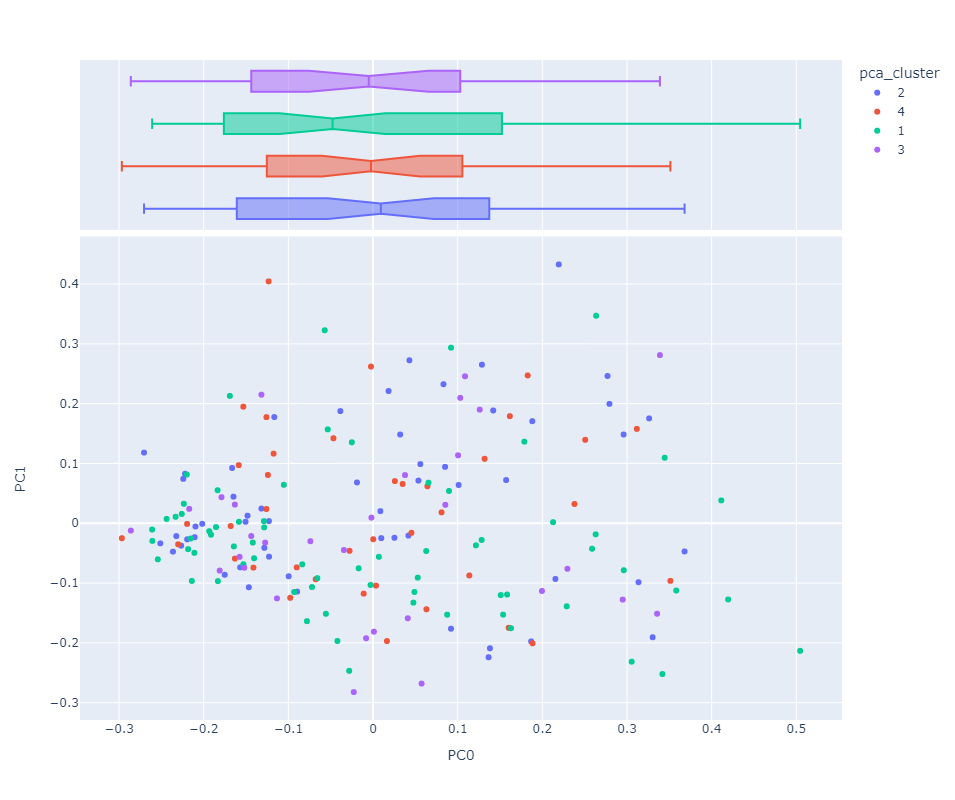<h1><center>Figure 15: Projected Documents on PC0 and PC1 by Principal Component Cluster</center></h1>

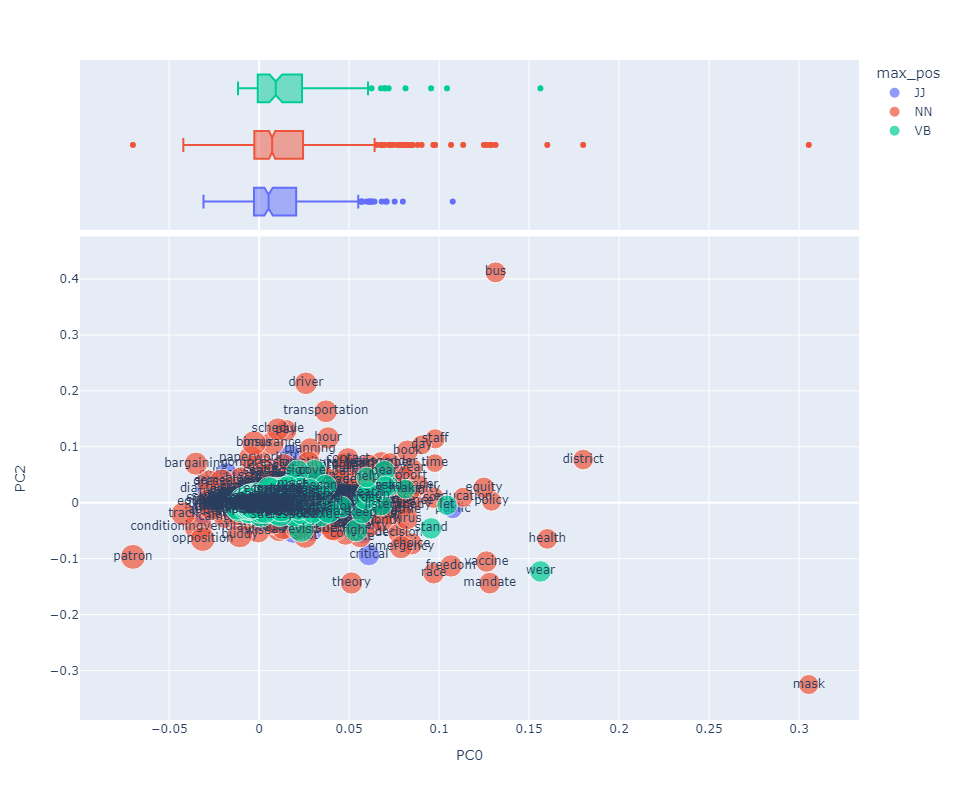<h1><center>Figure 16: Loadings of PC0 and PC2</center></h1>

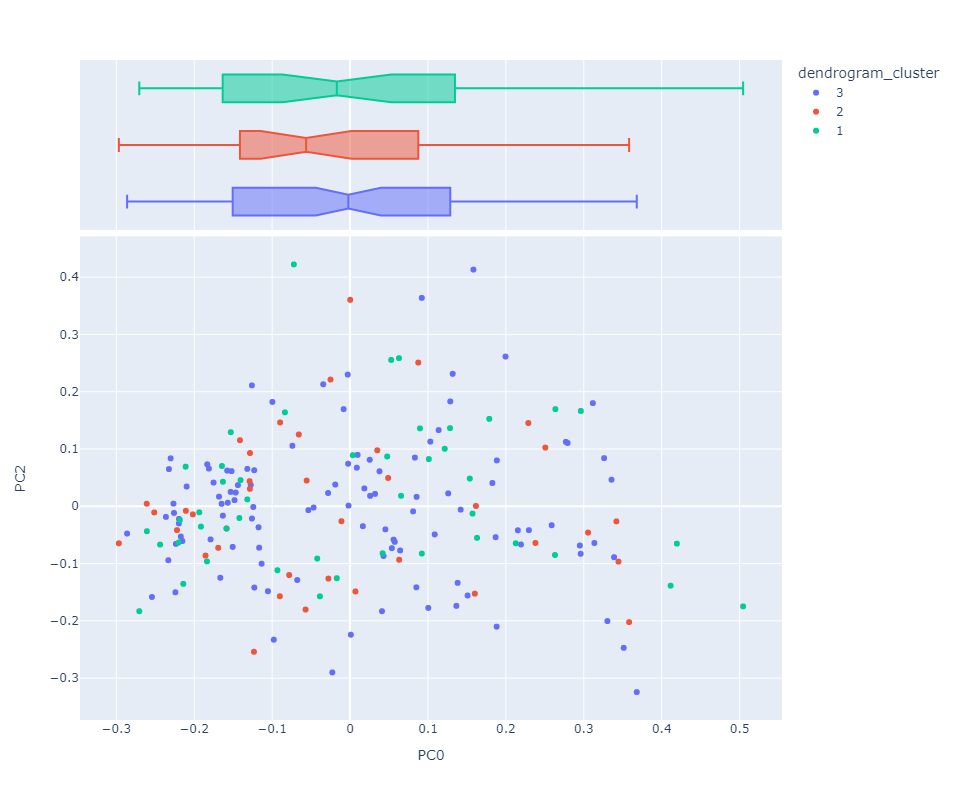<h1><center>Figure 17: Projected Documents on PC0 and PC2 by Dendrogram Cluster</center></h1>

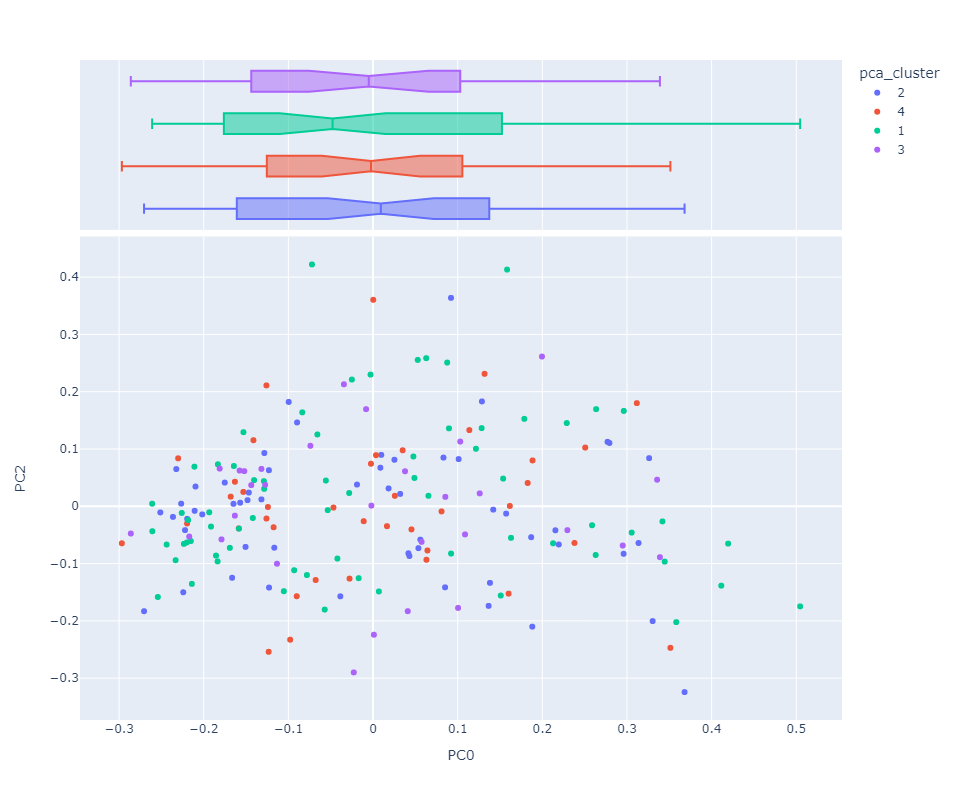<h1><center>Figure 18: Projected Documents on PC0 and PC2 by Principal Component Cluster</center></h1>

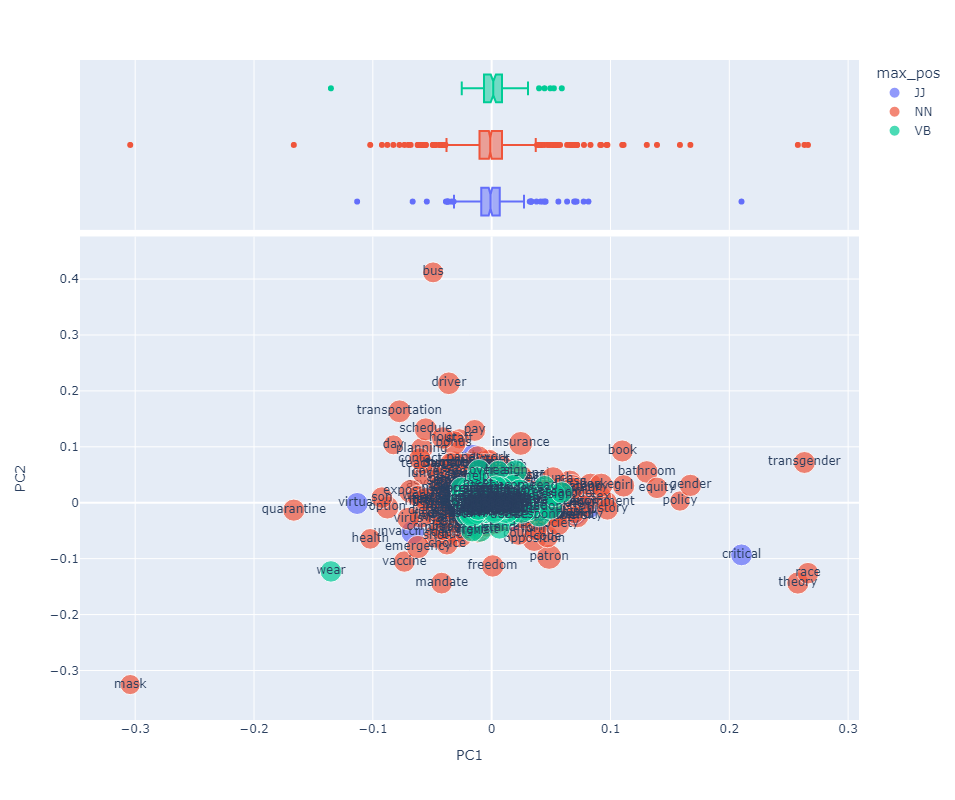<h1><center>Figure 19: Loadings of PC1 and PC2</center></h1>

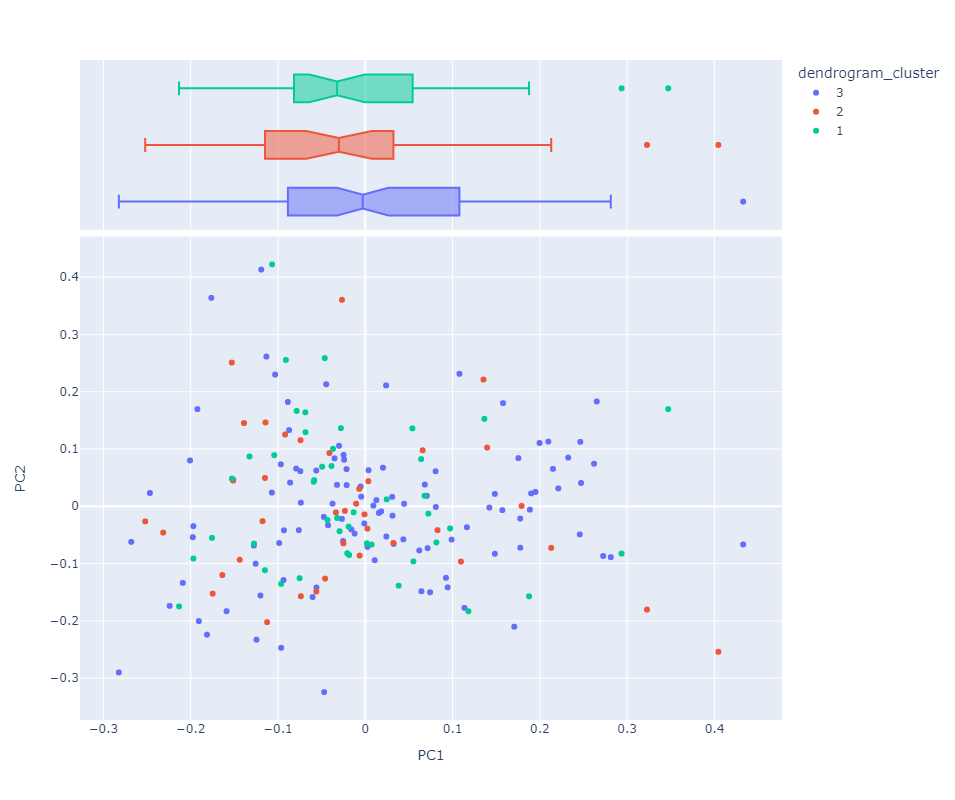<h1><center>Figure 20: Projected Documents on PC1 and PC2 by Dendrogram Cluster</center></h1>

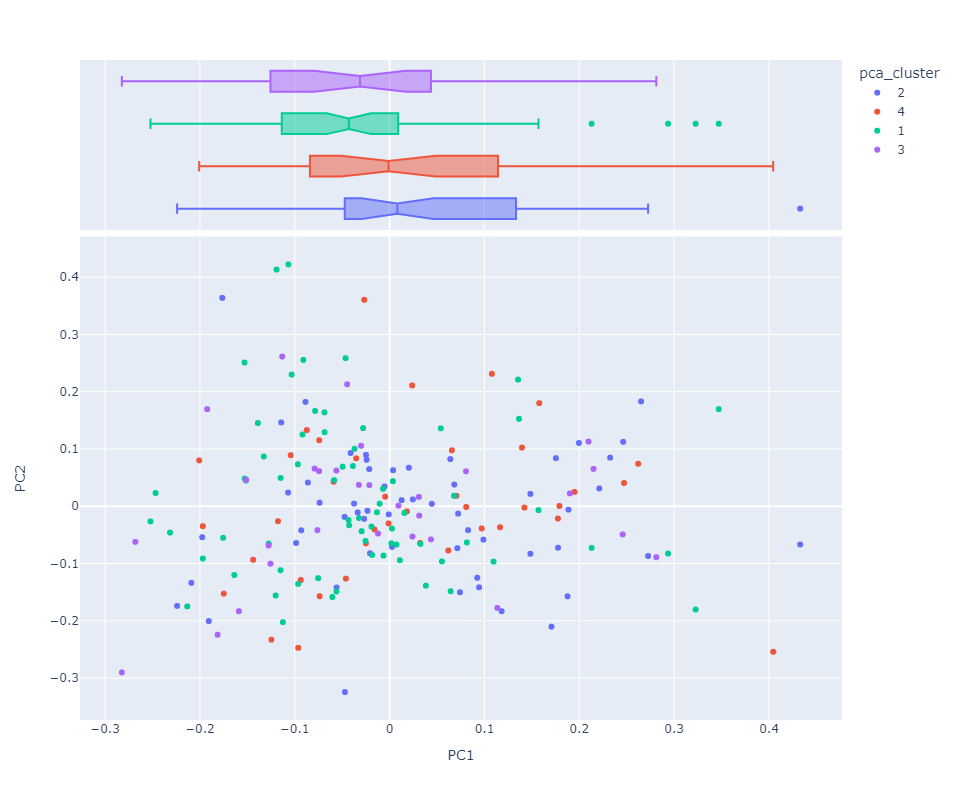<h1><center>Figure 21: Projected Documents on PC1 and PC2 by Principal Component Cluster</center></h1>

# Appendix

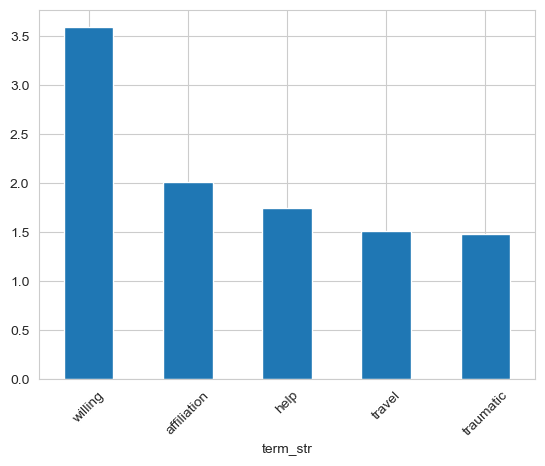<h1><center>Appendix Figure 1: Principal Components Scree Plot</center></h1>

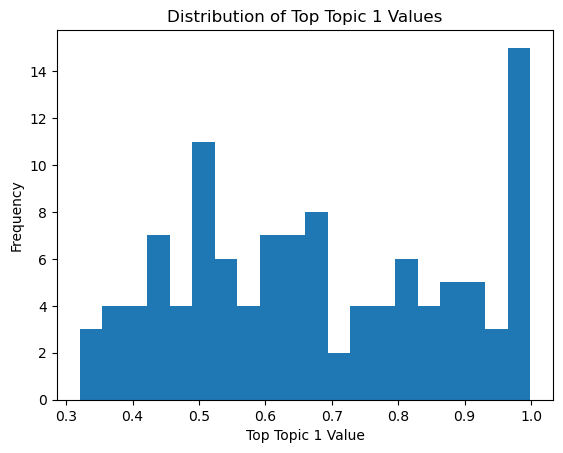<h1><center>Appendix Figure 2: Top Topic 1 Alpha Values</center></h1>

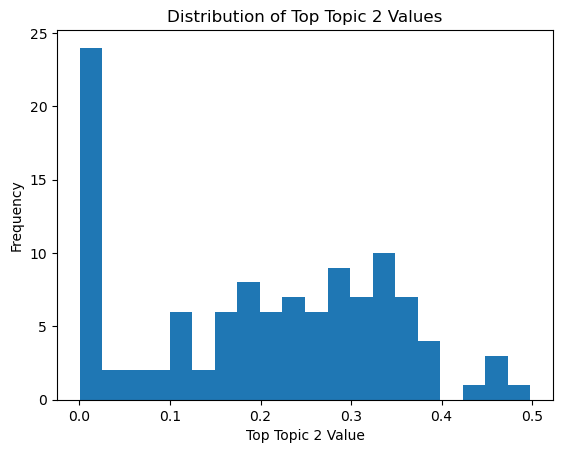<h1><center>Appendix Figure 3: Top Topic 2 Alpha Values</center></h1>

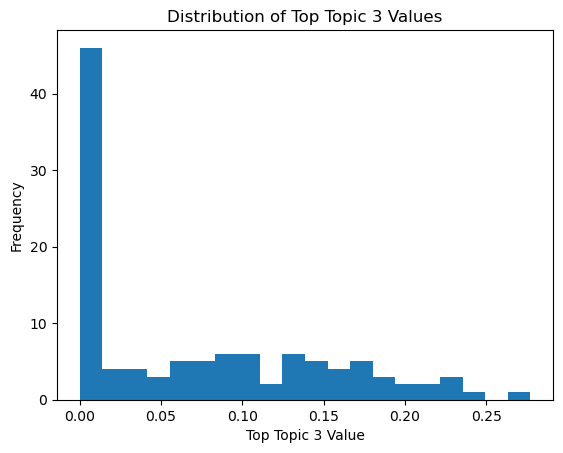<h1><center>Appendix Figure 4: Top Topic 3 Alpha Values</center></h1>